In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [79]:
df = pd.read_csv('/Users/sarthaksharna/KMeans Project/data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [80]:
df.shape

(200, 5)

In [81]:
print("Percentage of null values in each column : \n ")

missing_percent = df.isnull().mean()*100

missing_percent = missing_percent.round(2).astype(str) + "%"

missing_percent



Percentage of null values in each column : 
 


CustomerID                0.0%
Gender                    0.0%
Age                       0.0%
Annual Income (k$)        0.0%
Spending Score (1-100)    0.0%
dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [83]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [84]:
plt.style.use('dark_background')

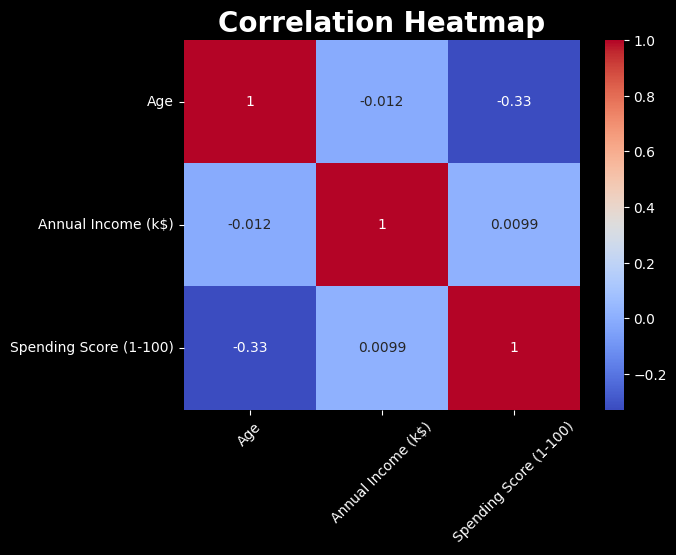

In [85]:
num_cols = [col for col in df.columns if df[col].dtype != 'O' and col != 'CustomerID']

sns.heatmap(df[num_cols].corr() , annot = True , cmap = 'coolwarm')

plt.title('Correlation Heatmap' , fontsize=20, color='#FFFFFF', fontweight='heavy')

plt.xticks(rotation=45)

plt.show()


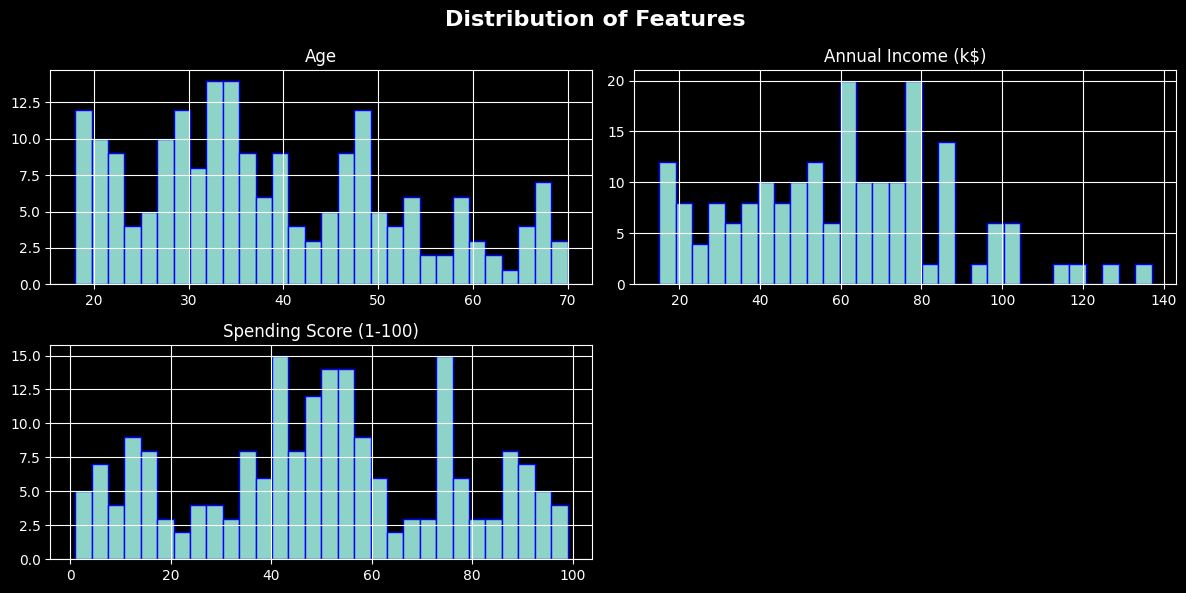

In [86]:
plt.style.use('dark_background')

df[['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins = 30, figsize=(12,6) ,edgecolor='blue')

plt.suptitle('Distribution of Features', fontsize=16, color='#FFFFFF', fontweight='heavy')


plt.tight_layout()
plt.show()

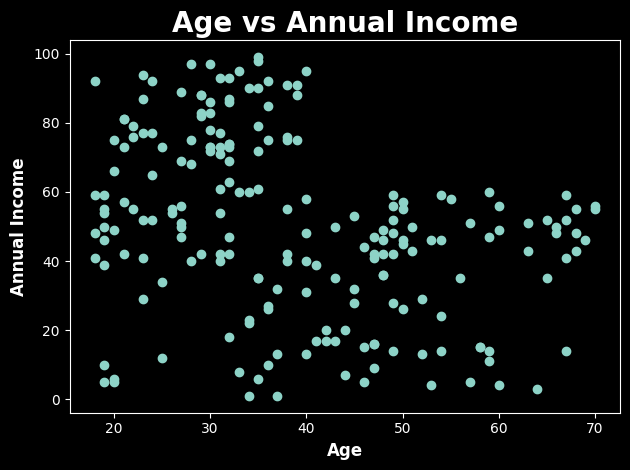

In [87]:
plt.scatter(df['Age'] , df['Spending Score (1-100)'])

plt.title('Age vs Annual Income' , fontsize=20, color='#FFFFFF', fontweight='heavy')

plt.xlabel('Age' , color='#FFFFFF', fontweight='bold' , fontsize=12)
plt.ylabel('Annual Income' , color='#FFFFFF', fontweight='bold' , fontsize=12)

plt.tight_layout()
plt.show()

In [88]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

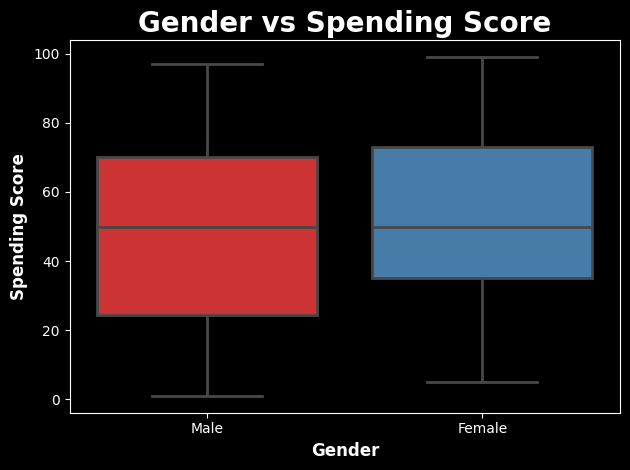

In [89]:
sns.boxplot( data = df , x = 'Gender' , y = 'Spending Score (1-100)' , palette = 'Set1' , hue = 'Gender' , linewidth = 2)

plt.title('Gender vs Spending Score' , fontsize=20, color='#FFFFFF', fontweight='heavy')

plt.xlabel('Gender' , color='#FFFFFF', fontweight='bold' , fontsize=12)
plt.ylabel('Spending Score' , color='#FFFFFF', fontweight='bold' , fontsize=12)


plt.tight_layout()
plt.show()

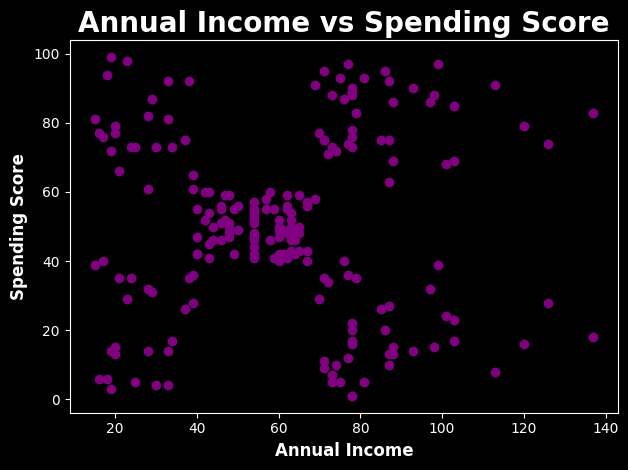

In [90]:
plt.scatter(df['Annual Income (k$)'] , df['Spending Score (1-100)'] , color = 'purple')

plt.title('Annual Income vs Spending Score' , fontsize=20, color='#FFFFFF', fontweight='heavy')

plt.xlabel('Annual Income' , color='#FFFFFF', fontweight='bold' , fontsize=12)
plt.ylabel('Spending Score' , color='#FFFFFF', fontweight='bold' , fontsize=12)

plt.tight_layout()
plt.show()

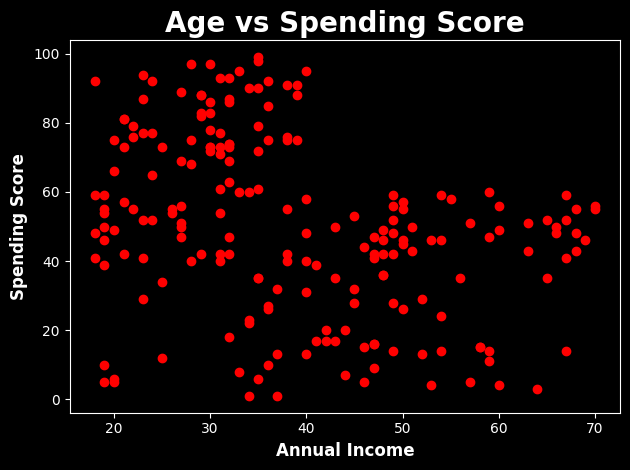

In [91]:
plt.scatter(df['Age'] , df['Spending Score (1-100)'] , color = 'red')

plt.title('Age vs Spending Score' , fontsize=20, color='#FFFFFF', fontweight='heavy')

plt.xlabel('Annual Income' , color='#FFFFFF', fontweight='bold' , fontsize=12)
plt.ylabel('Spending Score' , color='#FFFFFF', fontweight='bold' , fontsize=12)

plt.tight_layout()
plt.show()

COLUMNS TO CHOSE FOR CLUSTERING :

* AGE

* ANNUAL INCOME

* SPENDING SCORE

In [92]:
df.drop(columns = ['Age' , 'CustomerID' , 'Gender'] , axis = 1 ,  inplace = True)

df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [93]:
df.to_csv('cleaned_data.csv' , index = False)